In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/olive.csv")
df

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1,Southern Italy,North-Apulia,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,2,Southern Italy,North-Apulia,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,3,Southern Italy,North-Apulia,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,4,Southern Italy,North-Apulia,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,5,Southern Italy,North-Apulia,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
...,...,...,...,...,...,...,...,...,...,...,...
567,568,Northern Italy,West-Liguria,12.80,1.10,2.90,74.90,7.90,0.10,0.10,0.02
568,569,Northern Italy,West-Liguria,10.60,1.00,2.70,77.40,8.10,0.10,0.10,0.03
569,570,Northern Italy,West-Liguria,10.10,0.90,2.10,77.20,9.70,0.00,0.00,0.02
570,571,Northern Italy,West-Liguria,9.90,1.20,2.50,77.50,8.70,0.10,0.10,0.02


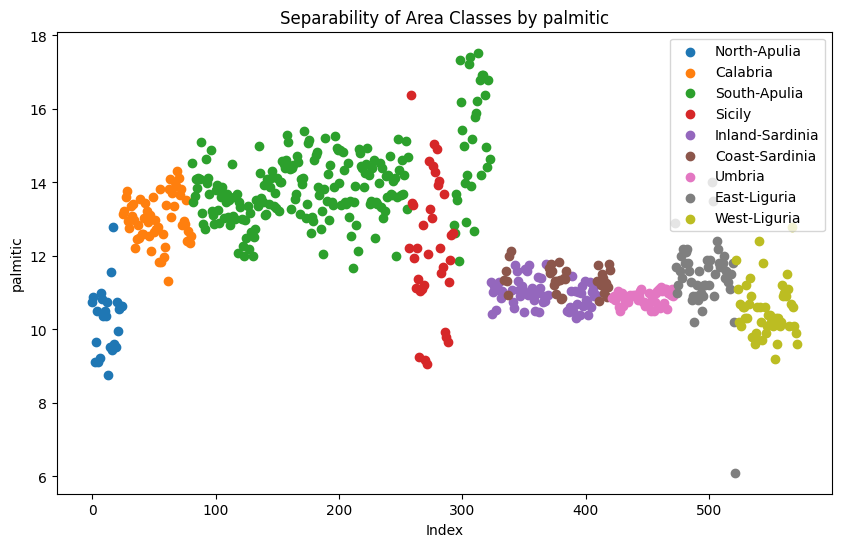

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_separability(data, column):
    plt.figure(figsize=(10, 6))
    area_classes = data['area'].unique()

    for area_class in area_classes:
        area_data = data[data['area'] == area_class]
        plt.scatter(area_data.index, area_data[column], label=area_class)

    plt.title(f'Separability of Area Classes by {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Load your dataset into a DataFrame

# Call the function to plot the separability of area classes by a particular column
plot_separability(df, 'palmitic')



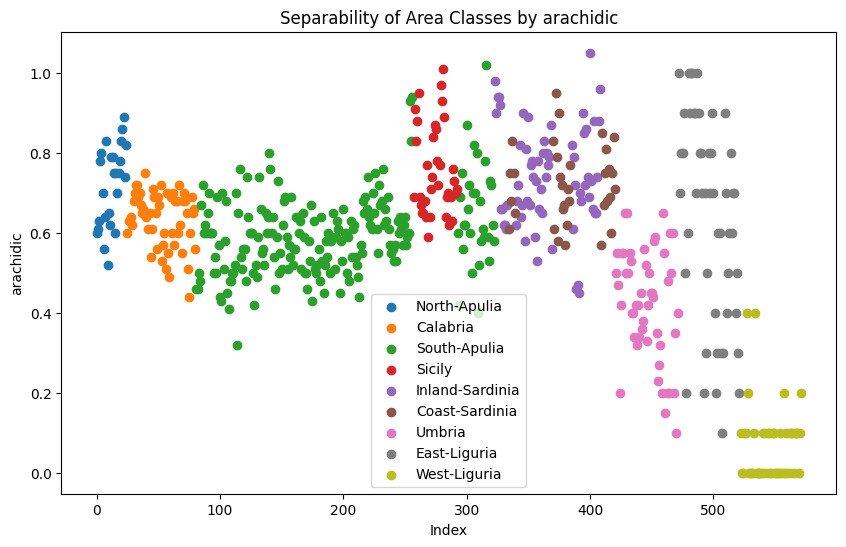

In [ ]:
plot_separability(df, 'arachidic')

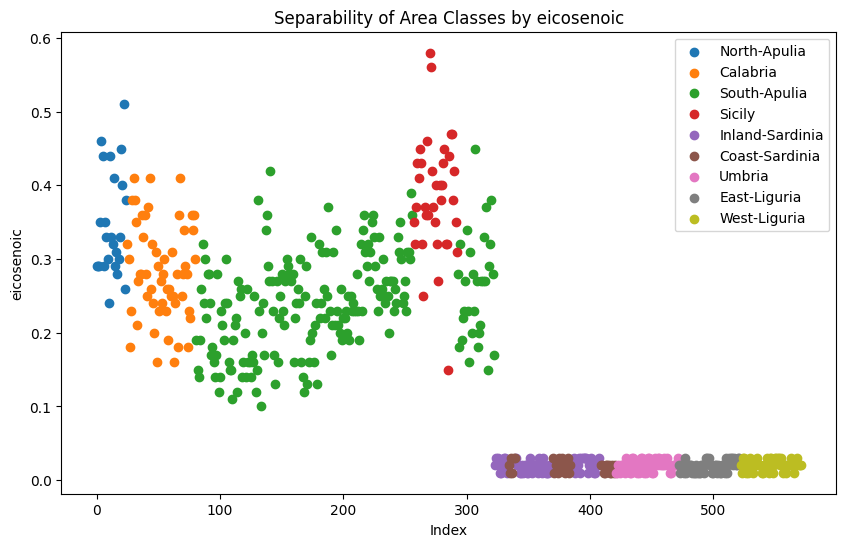

In [ ]:
plot_separability(df, 'eicosenoic')

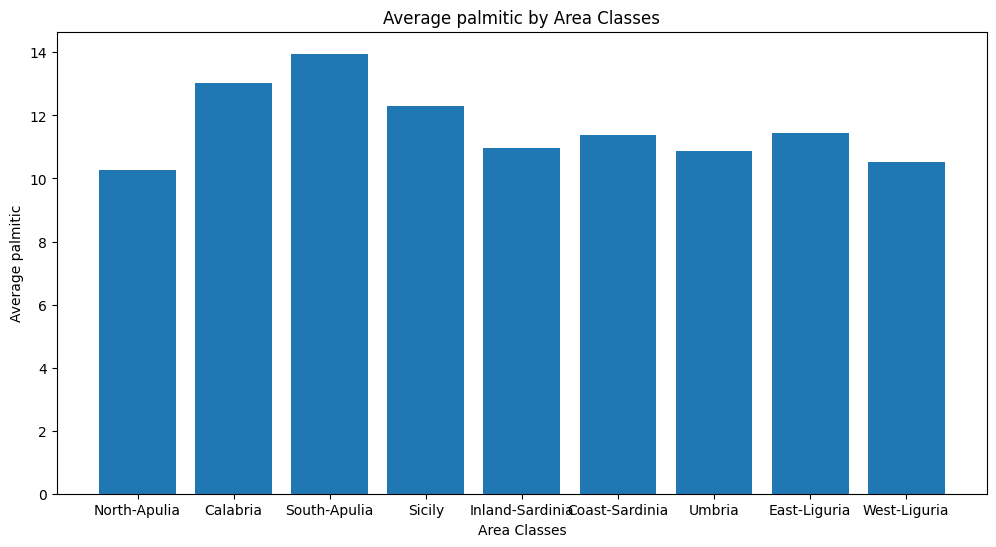

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_by_area_class(data, column):
    area_classes = data['area'].unique()
    avg_values = [data[data['area'] == area_class][column].mean() for area_class in area_classes]

    plt.figure(figsize=(12, 6))
    plt.bar(area_classes, avg_values)
    plt.title(f'Average {column} by Area Classes')
    plt.xlabel('Area Classes')
    plt.ylabel(f'Average {column}')
    plt.show()

# Call the function to plot the average of a specific parameter for each area class
plot_average_by_area_class(df, 'palmitic')



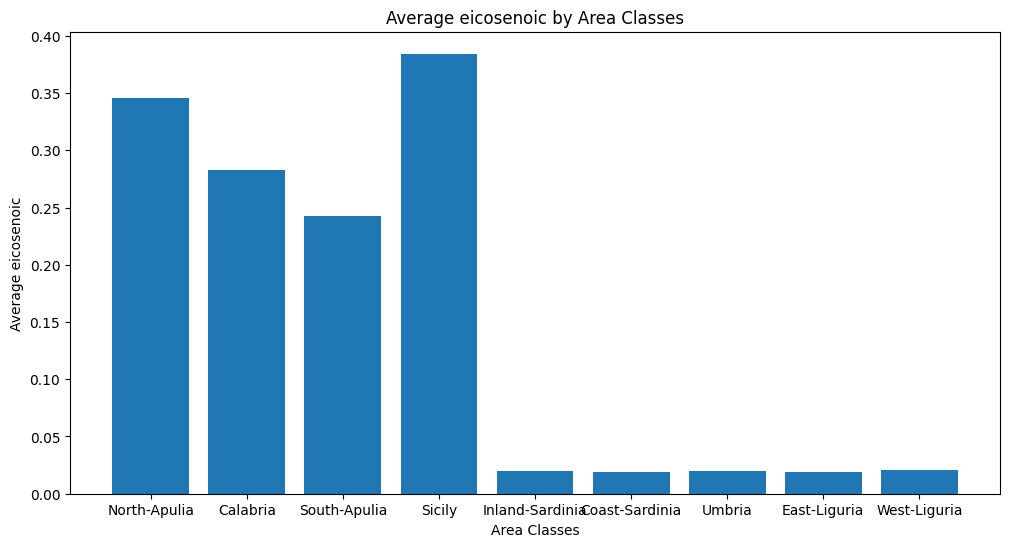

In [ ]:
plot_average_by_area_class(df, 'eicosenoic')

In [ ]:
import pandas as pd

def calculate_dispersion(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    dispersion = data[numeric_columns].std().to_dict()
    return dispersion

def print_dispersion(dispersion):
    print("Parameter    Dispersion")
    print("------------------------")
    for parameter, value in dispersion.items():
        print(f"{parameter:<12} {value:.6f}")

# Load your dataset into a DataFrame

# Call the function to calculate the dispersion of every parameter
dispersion = calculate_dispersion(df)
print_dispersion(dispersion)


Parameter    Dispersion
------------------------
Unnamed: 0   165.266452
palmitic     1.685923
palmitoleic  0.524944
stearic      0.367449
oleic        4.058102
linoleic     2.427992
linolenic    0.129687
arachidic    0.220302
eicosenoic   0.140833


In [ ]:
import pandas as pd

def calculate_averages(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    averages = data[numeric_columns].mean().to_dict()
    return averages

def print_averages(averages):
    print("Parameter    Average")
    print("---------------------")
    for parameter, value in averages.items():
        print(f"{parameter:<12} {value:.6f}")

# Load your dataset into a DataFrame

# Call the function to calculate the average of every parameter
averages = calculate_averages(df)

# Call the function to print the averages in column format
print_averages(averages)


Parameter    Average
---------------------
Unnamed: 0   286.500000
palmitic     12.317413
palmitoleic  1.260944
stearic      2.288654
oleic        73.117483
linoleic     9.805280
linolenic    0.318881
arachidic    0.580979
eicosenoic   0.162815


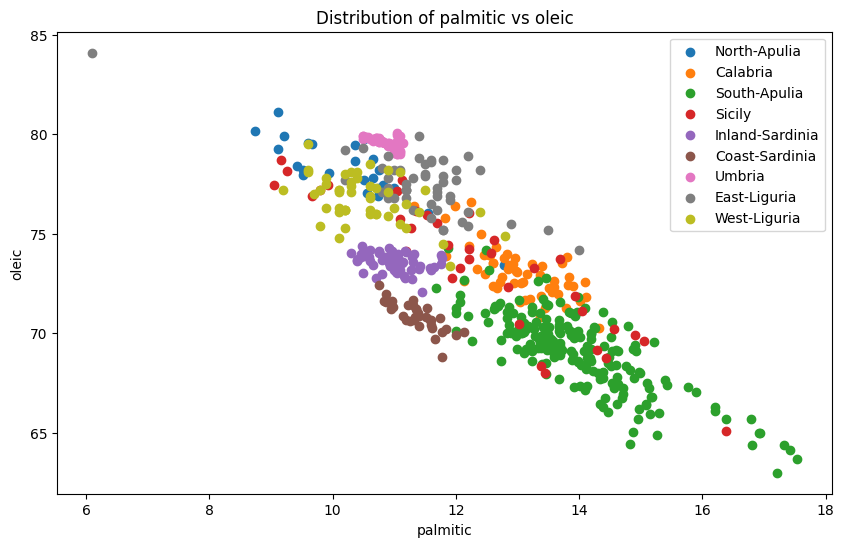

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_attribute_distribution(data, attribute1, attribute2):
    area_classes = data['area'].unique()
    plt.figure(figsize=(10, 6))

    for area_class in area_classes:
        area_data = data[data['area'] == area_class]
        plt.scatter(area_data[attribute1], area_data[attribute2], label=area_class)

    plt.title(f'Distribution of {attribute1} vs {attribute2}')
    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    plt.legend()
    plt.show()

# Load your dataset into a DataFrame

# Define the two attributes you want to create a scatterplot for
attribute1 = 'palmitic'
attribute2 = 'oleic'

# Call the function to plot the distribution of the two attributes
plot_attribute_distribution(df, attribute1, attribute2)


In [ ]:
df = df.drop("Unnamed: 0", axis='columns')

In [ ]:
import pandas as pd

def normalize_dataframe(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    normalized_data = data.copy()

    for column in numeric_columns:
        min_value = data[column].min()
        max_value = data[column].max()
        normalized_data[column] = (data[column] - min_value) / (max_value - min_value)

    return normalized_data

# Load your dataset into a DataFrame

# Call the function to normalize the data in the DataFrame
df = normalize_dataframe(df)

In [ ]:
X = df.drop("area", axis='columns')
X.head()

,region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,Southern Italy,0.406824,0.226415,0.331839,0.721801,0.219178,0.486486,0.571429,0.491228
1,Southern Italy,0.418198,0.218868,0.322870,0.667773,0.325832,0.418919,0.580952,0.491228
2,Southern Italy,0.263342,0.147170,0.421525,0.859242,0.098826,0.418919,0.600000,0.491228
3,Southern Italy,0.311461,0.158491,0.394619,0.782938,0.167319,0.675676,0.742857,0.596491
4,Southern Italy,0.385827,0.196226,0.479821,0.697156,0.219178,0.675676,0.761905,0.789474


In [ ]:
y = df["area"]
y

0      North-Apulia
1      North-Apulia
2      North-Apulia
3      North-Apulia
4      North-Apulia
           ...     
567    West-Liguria
568    West-Liguria
569    West-Liguria
570    West-Liguria
571    West-Liguria
Name: area, Length: 572, dtype: object

In [ ]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [ ]:
X.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,region_Northern Italy,region_Sardinia,region_Southern Italy
0,0.406824,0.226415,0.331839,0.721801,0.219178,0.486486,0.571429,0.491228,0,0,1
1,0.418198,0.218868,0.322870,0.667773,0.325832,0.418919,0.580952,0.491228,0,0,1
2,0.263342,0.147170,0.421525,0.859242,0.098826,0.418919,0.600000,0.491228,0,0,1
3,0.311461,0.158491,0.394619,0.782938,0.167319,0.675676,0.742857,0.596491,0,0,1
4,0.385827,0.196226,0.479821,0.697156,0.219178,0.675676,0.761905,0.789474,0,0,1


In [ ]:
y.head()

,Calabria,Coast-Sardinia,East-Liguria,Inland-Sardinia,North-Apulia,Sicily,South-Apulia,Umbria,West-Liguria
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X), len(X_train), len(X_test)

(572, 400, 172)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=9, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model.fit(X_train, 
          y_train, 
          epochs=500, 
          validation_data=(X_test, y_test),
          verbose=0)

model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9302


[0.19699083268642426, 0.930232584476471]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, activation="relu"),
    tf.keras.layers.Dense(units=20, activation="relu"),
    tf.keras.layers.Dense(units=9, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model.fit(X_train, 
          y_train, 
          epochs=500, 
          validation_data=(X_test, y_test),
          verbose=0)

model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.9477


[0.1605023741722107, 0.9476743936538696]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, activation="relu"),
    tf.keras.layers.Dense(units=20, activation="relu"),
    tf.keras.layers.Dense(units=9, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=40, 
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler],
                    verbose=0)

Text(0.5, 1.0, 'LR vs loss')

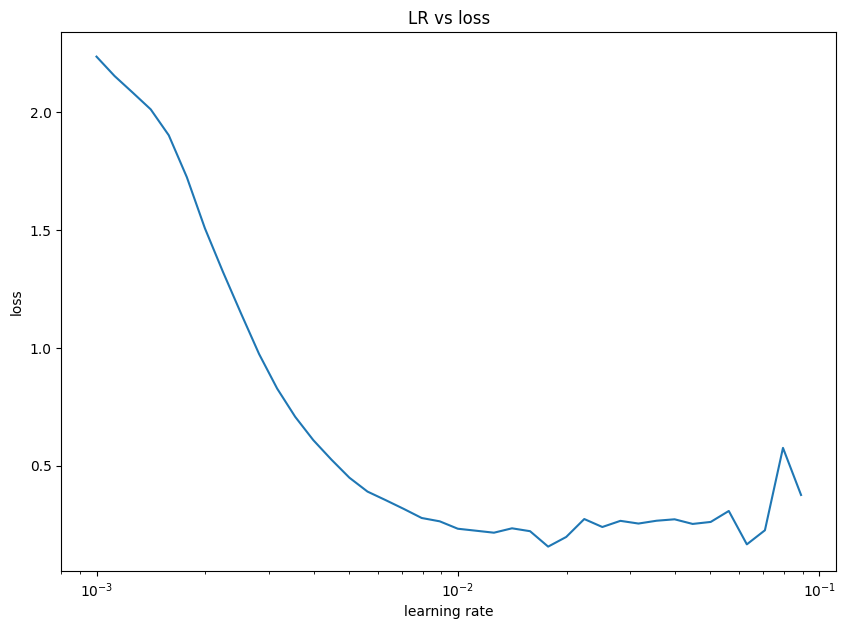

In [ ]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("LR vs loss")

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8372


[0.3617789149284363, 0.8372092843055725]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, activation="relu"),
    tf.keras.layers.Dense(units=20, activation="relu"),
    tf.keras.layers.Dense(units=9, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)

model.fit(X_train, 
          y_train, 
          epochs=500, 
          validation_data=(X_test, y_test),
          verbose=0)

model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.9186


[0.27560245990753174, 0.9186046719551086]

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(y_test,y_preds, classes=None):
  figsize = (30,30)
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  classes = classes

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(
      title="Confusion Matrix", 
      xlabel="Predictions", 
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15
            )

In [ ]:
y_probs = model.predict(X_test)
y_probs[:10]

6/6 [==============================] - 0s 1ms/step


array([[1.0266060e-17, 7.3100665e-31, 9.9999887e-01, 1.8594752e-17,
        2.3830259e-07, 9.5312570e-11, 7.0082885e-21, 8.5035595e-07,
        5.5365821e-18],
       [9.9783403e-01, 2.5720698e-17, 7.4973144e-13, 9.5632044e-20,
        1.7784611e-12, 2.1649201e-03, 1.0670956e-06, 5.9808804e-17,
        1.6890385e-10],
       [7.7813139e-10, 7.1940184e-07, 3.7149974e-21, 2.7376965e-16,
        7.6873485e-24, 6.3664867e-13, 9.9999923e-01, 2.2922389e-28,
        3.9991392e-11],
       [2.9422245e-38, 1.2874909e-03, 1.9796738e-18, 9.9871129e-01,
        2.4298317e-28, 2.7946029e-24, 1.1488246e-06, 2.0077675e-26,
        3.5056270e-34],
       [2.3108241e-08, 3.2542327e-26, 2.4112393e-10, 1.6265725e-26,
        3.1136637e-21, 1.1199328e-17, 3.2290668e-08, 1.3664760e-18,
        9.9999994e-01],
       [1.2571425e-12, 1.1851450e-10, 3.9226055e-23, 4.2150873e-24,
        1.9881046e-33, 5.1653536e-11, 9.9999994e-01, 1.5370537e-36,
        4.3754474e-16],
       [3.7915914e-04, 1.4179616e-10, 1.

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:20]

array([2, 0, 6, 3, 8, 6, 6, 0, 6, 6, 7, 6, 8, 2, 8, 6, 6, 6, 6, 1])

In [ ]:
class_names = ["Calabria", 
               "Coast-Sardinia",
"East-Liguria",
"Inland-Sardinia",
"North-Apulia",
"Sicily",
"South-Apulia",
"Umbria",
"West-Liguria"]

In [ ]:
# pd.from_dummies(y_test)
y_test = y_test.to_numpy().argmax(axis=1)

In [ ]:
y_test

array([2, 0, 6, 3, 8, 6, 6, 0, 6, 6, 7, 5, 8, 2, 8, 6, 6, 6, 6, 1, 0, 5,
       3, 5, 8, 0, 6, 8, 6, 0, 6, 8, 7, 8, 6, 0, 4, 6, 4, 6, 6, 7, 3, 6,
       6, 6, 5, 8, 6, 7, 3, 0, 6, 6, 5, 3, 6, 6, 0, 5, 0, 4, 8, 8, 6, 2,
       6, 0, 6, 5, 3, 4, 3, 7, 6, 7, 5, 1, 6, 3, 6, 6, 6, 6, 6, 8, 4, 2,
       5, 2, 6, 5, 3, 2, 1, 6, 8, 6, 6, 6, 7, 6, 0, 1, 7, 3, 7, 6, 8, 6,
       0, 6, 8, 8, 0, 6, 0, 6, 0, 4, 3, 6, 2, 7, 6, 7, 6, 3, 1, 0, 4, 8,
       6, 8, 6, 4, 3, 6, 6, 1, 6, 4, 5, 5, 6, 2, 6, 2, 8, 6, 3, 0, 6, 0,
       6, 1, 6, 6, 8, 7, 3, 6, 3, 1, 3, 8, 7, 0, 6, 6, 3, 7])

In [ ]:
y_preds

array([2, 0, 6, 3, 8, 6, 6, 0, 6, 6, 7, 6, 8, 2, 8, 6, 6, 6, 6, 1, 0, 4,
       3, 0, 8, 0, 6, 8, 6, 0, 6, 8, 7, 8, 6, 0, 4, 6, 4, 6, 6, 7, 3, 6,
       6, 6, 6, 8, 6, 7, 3, 5, 6, 6, 6, 3, 6, 6, 0, 5, 0, 4, 8, 8, 6, 2,
       6, 0, 6, 0, 3, 5, 3, 7, 6, 7, 5, 1, 6, 3, 6, 6, 6, 6, 6, 8, 4, 7,
       5, 2, 6, 5, 3, 2, 1, 6, 8, 6, 6, 6, 7, 6, 5, 1, 7, 3, 7, 6, 8, 6,
       0, 6, 8, 8, 0, 6, 0, 6, 6, 4, 3, 6, 2, 7, 6, 7, 6, 3, 1, 2, 4, 8,
       6, 8, 6, 4, 3, 6, 6, 1, 6, 4, 4, 5, 6, 2, 6, 2, 8, 6, 3, 0, 6, 0,
       6, 1, 6, 6, 8, 7, 3, 6, 3, 3, 3, 8, 7, 0, 6, 6, 3, 7])

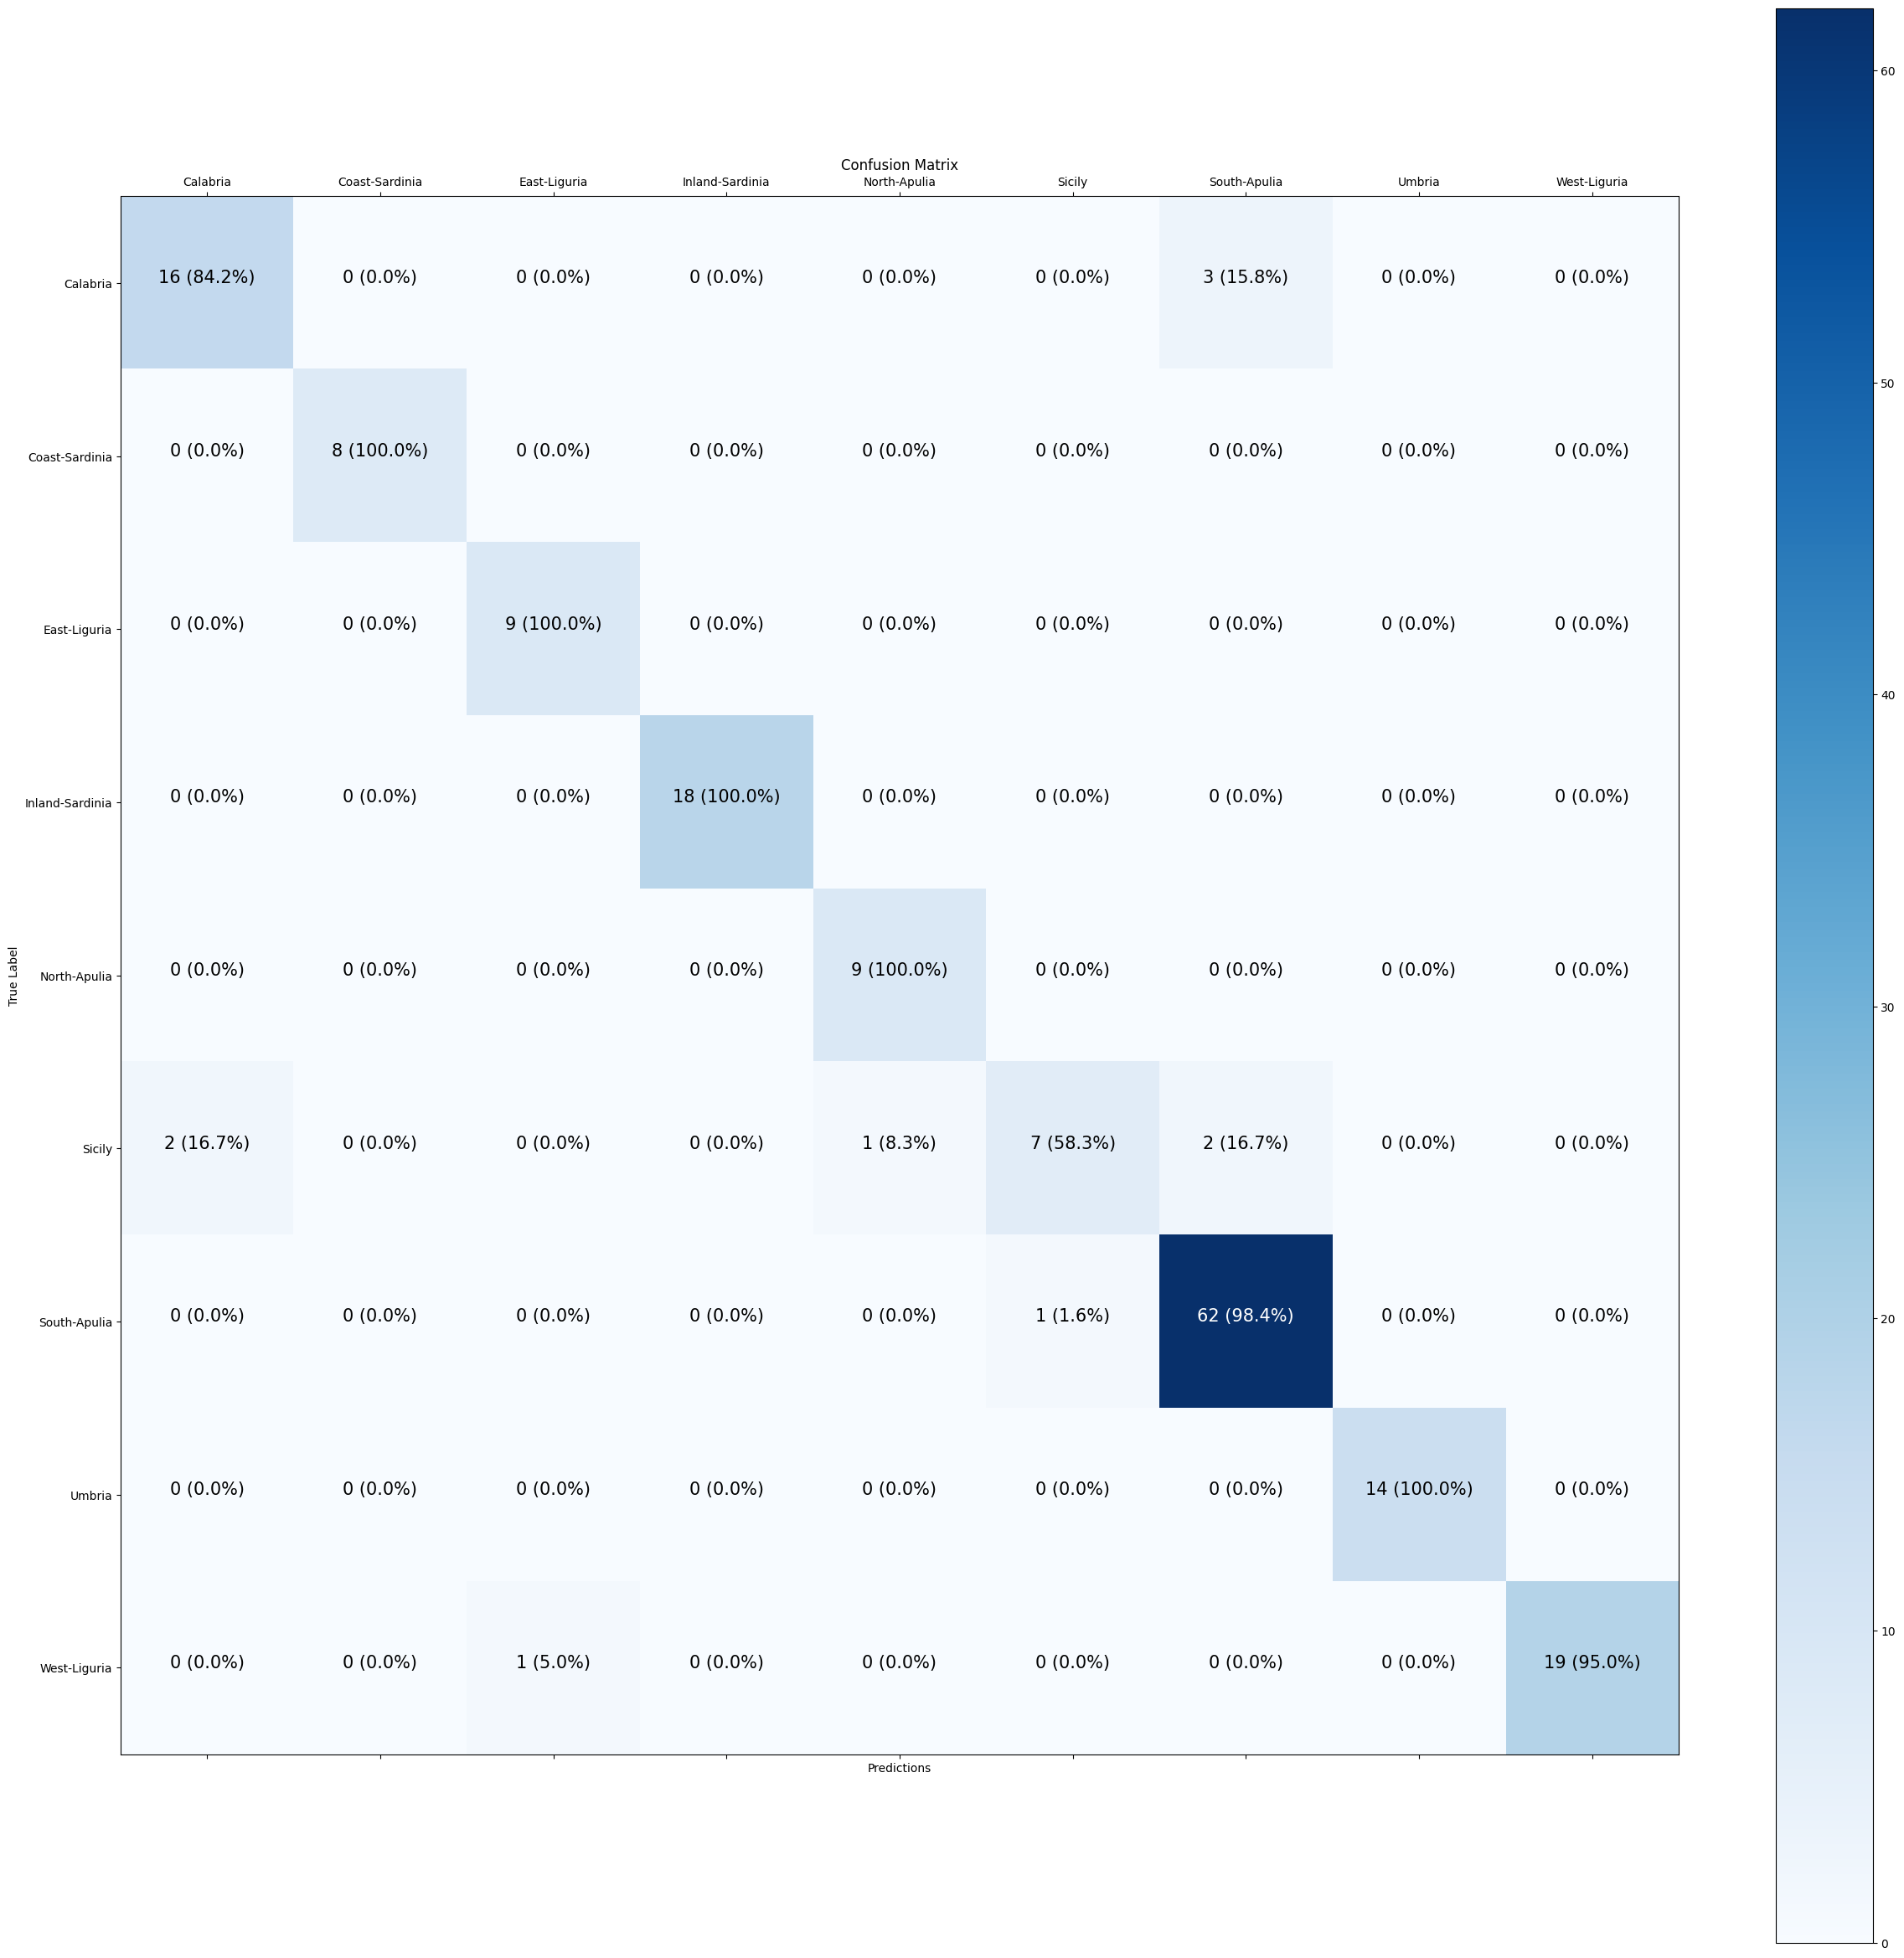

In [ ]:
print_confusion_matrix(y_test, y_preds, class_names)